In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Understanding Product Categories 

**Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?**

In [2]:
# to import a csv file 
amzUK_df = pd.read_csv('C:\\Users\\tevfi\\Desktop\\Ironhack\\lab\\amz_uk_price_prediction_dataset.csv') 

In [3]:
display(amzUK_df.head())

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
amzUK_df.columns # to check the all columns' name to understan what type of info we have

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [8]:
amzUK_df.isnull().sum() # to check if there is a null data 

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [9]:
# to create a frequency table for product category

frequency_table = amzUK_df['category'].value_counts()
print(frequency_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [10]:
# top 5 most listed product categories with (.nlargest() function)

top_5_categories = frequency_table.nlargest(5)

print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


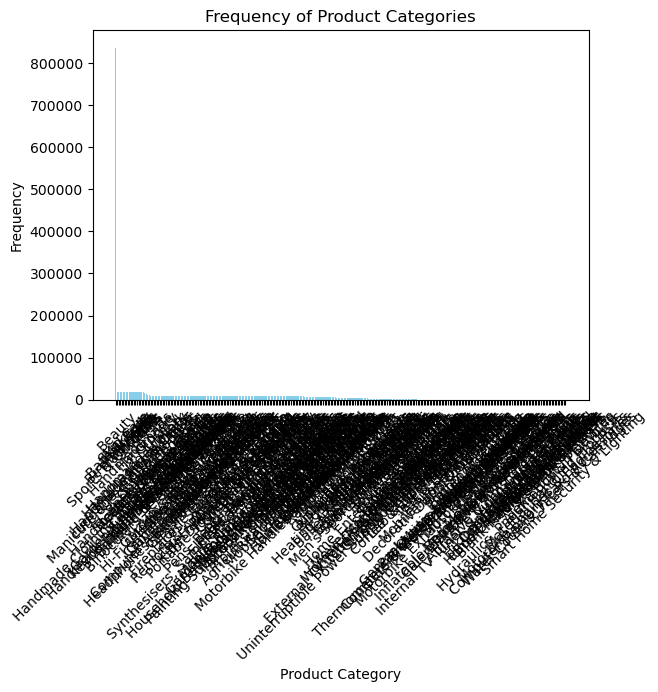

In [11]:
# visualizing the distribution of products across different categories using a bar chart 

plt.bar(frequency_table.index, frequency_table.values, color='skyblue')
plt.title('Frequency of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Kategorileri eğik göstermek için
plt.show()

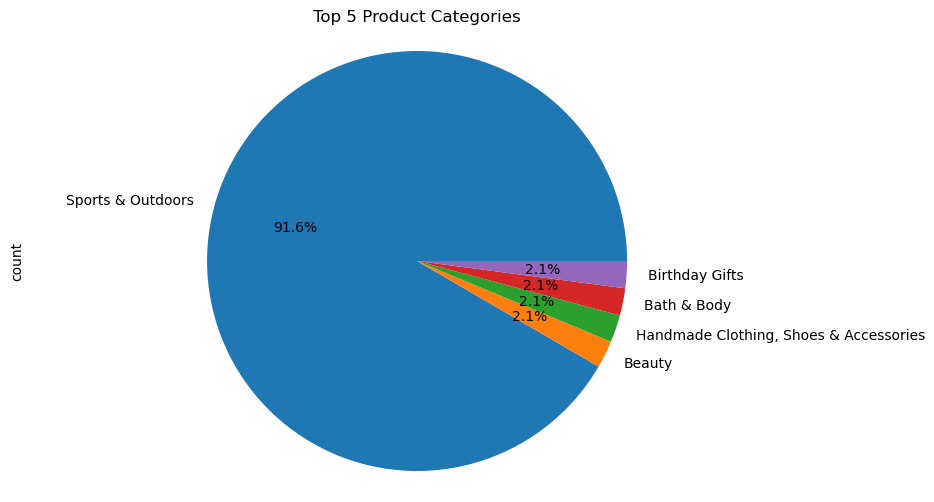

In [12]:
# pie chart for top 5 categories 
top_5_categories.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.title('Top 5 Product Categories')
plt.axis('equal')  # Daireyi düzgün göstermek için
plt.show()

## Part 2: Delving into Product Pricing

**Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?**

In [13]:
# Measures of Centrality

mean_price = amzUK_df['price'].mean()
print("Average Price: ", mean_price)

Average Price:  89.24380943923663


In [14]:
median_price = amzUK_df['price'].median()
print("Median Price: ", median_price)

Median Price:  19.09


In [15]:
mode_price = amzUK_df['price'].mode()[0]
print("Mode Price: ", mode_price)

Mode Price:  9.99


In [16]:
# Measures of Dispersion
price_variance = amzUK_df['price'].var()
price_std_deviation = amzUK_df['price'].std()
print("Variance of the price: ", price_variance)
print("Standard Deviation of the price: ", price_std_deviation)

Variance of the price:  119445.48532256528
Standard Deviation of the price:  345.60886175352226


In [17]:
#range 
min_price = amzUK_df['price'].min()
max_price = amzUK_df['price'].max()
price_range = max_price - min_price
print("Price Range:", price_range)


Price Range: 100000.0


In [18]:
q1_price = amzUK_df['price'].quantile(0.25)
q3_price = amzUK_df['price'].quantile(0.75)
iqr = q3_price - q1_price
print(" Interquartile range (IQR):", iqr)


 Interquartile range (IQR): 36.0


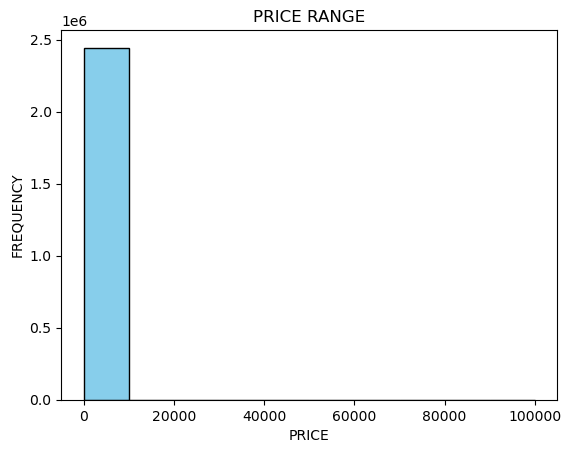

In [19]:
# Visualizations
plt.hist(amzUK_df['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('PRICE RANGE')
plt.xlabel('PRICE')
plt.ylabel('FREQUENCY')
plt.show()

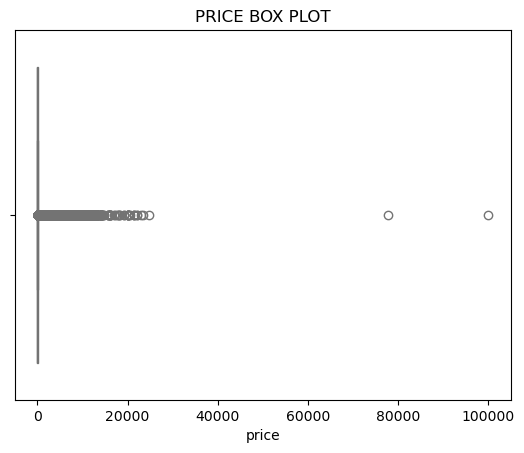

In [20]:
sns.boxplot(x=amzUK_df['price'], color='lightgreen')
plt.title('PRICE BOX PLOT')
plt.show()


Based on price box plot there are two products that are priced significantly higher than the rest
there is a specific price range between 0- 10000 where most products fall. 

### Part 3: Unpacking Product Ratings

**Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?**

In [21]:
# Measures of Centrality

mean_rating = amzUK_df['stars'].mean()
print("Average Rating: ", mean_rating)

Average Rating:  2.152836472966065


In [22]:
median_rating = amzUK_df['stars'].median()
print("Median rating: ", median_rating)

Median rating:  0.0


In [23]:
mode_rating = amzUK_df['stars'].mode()[0]
print("Mode Rating: ", mode_rating)

Mode Rating:  0.0


In [24]:
# Measures of Dispersion

rating_variance = amzUK_df['stars'].var()
rating_std_deviation = amzUK_df['stars'].std()
print("Variance of ratings: ", rating_variance)
print("Standard Deviation of ratings: ", rating_std_deviation) 

Variance of ratings:  4.81743402976196
Standard Deviation of ratings:  2.1948653785054697


In [25]:
# interquartile range
q1_rating = amzUK_df['stars'].quantile(0.25)
q3_rating = amzUK_df['stars'].quantile(0.75)
iqr = q3_rating - q1_rating 
print("Interquartile range (IQR): ", iqr)

Interquartile range (IQR):  4.4


In [26]:
# Shape of the Distribution
# SKEWNESS
from scipy.stats import skew
skewness_rating = skew(amzUK_df['stars'])
print("Skewness:", skewness_rating)


Skewness: 0.08120730776283354


In [27]:
# KURTOSIS 
from scipy.stats import kurtosis
kurt_rating = kurtosis(amzUK_df['stars'])
print("Kurtosis:", kurt_rating)


Kurtosis: -1.926004642549839


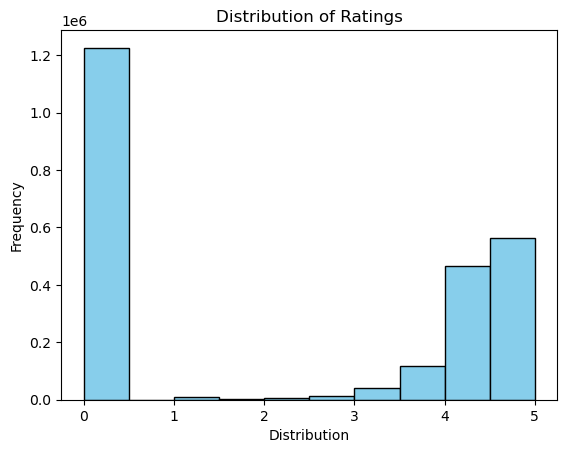

In [28]:
plt.hist(amzUK_df['stars'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.show()

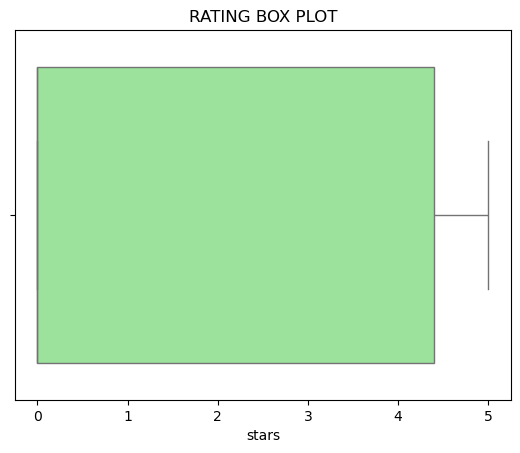

In [29]:
sns.boxplot(x=amzUK_df['stars'], color='lightgreen')
plt.title('RATING BOX PLOT')
plt.show()

#### SUMMARIZE 

Sport & Outdoor category dominate the listings with having the highist listing percentage of 91.6.

Based on price box plot there are two products that are priced significantly higher than the rest.

There is a specific price range between 0- 10000 where most products fall. 

The hist chart of distribution of ratings shows that the most common rating star is under one. 
